In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import math
from pyomo.environ import *

In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from __future__ import division
from pyomo.opt import SolverFactory

In [4]:
# Reading the data from Excel workbooka
data = 'Staffing+Data.xlsx'
data_excel = pd.ExcelFile(data)
print(data_excel.sheet_names)

['DemandData', 'StaffAvailability', 'Cost', 'ServiceRate', 'Data Dictionary']


In [5]:
sheet_1 = data_excel.parse('DemandData')
sheet_1.head()

,State,Month,Demand
0,A,Jan,5240
1,A,Feb,4878
2,A,Mar,5942
3,A,Apr,2297
4,A,May,1992


In [6]:
sheet_2 = data_excel.parse('StaffAvailability')
sheet_2.head()

,State,Month,LB,UB,StaffAvPer
0,A,Jan,0.70,0.90,0.81
1,A,Feb,0.65,0.85,0.76
2,A,Mar,0.70,0.80,0.75
3,A,Apr,0.75,0.85,0.80
4,A,May,0.70,0.85,0.78


In [7]:
sheet_3 = data_excel.parse('Cost')
sheet_3.head()

,State,Month,AnnualSalary,MonthlySalary,UnitOutSourceCost
0,A,Jan,60000,5000.0,180
1,A,Feb,60000,5000.0,180
2,A,Mar,60000,5000.0,180
3,A,Apr,60000,5000.0,180
4,A,May,60000,5000.0,180


In [8]:
sheet_4 = data_excel.parse('ServiceRate')
sheet_4.head()

,MgAppServedPerMonth
0,40


In [9]:
sheet_5 = data_excel.parse('Data Dictionary')
sheet_5.head()

,Column name,Description
0,State,Location of the Bank
1,Month,Month of the year
2,Demand,Number of insurance applications that are expe...
3,StaffAvPer,Average availability of an FTE (Full Time Empl...
4,LB,Minimum availability of an FTE


In [10]:
data_1 = pd.merge(sheet_1, sheet_2, on=['State','Month'])
data_1

,State,Month,Demand,LB,UB,StaffAvPer
0,A,Jan,5240,0.70,0.90,0.81
1,A,Feb,4878,0.65,0.85,0.76
2,A,Mar,5942,0.70,0.80,0.75
3,A,Apr,2297,0.75,0.85,0.80
4,A,May,1992,0.70,0.85,0.78
5,A,Jun,2275,0.65,0.80,0.73
6,A,Jul,5334,0.60,0.75,0.68
7,A,Aug,3371,0.65,0.85,0.76
8,A,Sep,3759,0.70,0.90,0.81
9,A,Oct,3529,0.65,0.80,0.73


In [11]:
final_data = pd.merge(data_1,sheet_3, on=['State','Month'])
final_data

,State,Month,Demand,LB,UB,StaffAvPer,AnnualSalary,MonthlySalary,UnitOutSourceCost
0,A,Jan,5240,0.70,0.90,0.81,60000,5000.000000,180
1,A,Feb,4878,0.65,0.85,0.76,60000,5000.000000,180
2,A,Mar,5942,0.70,0.80,0.75,60000,5000.000000,180
3,A,Apr,2297,0.75,0.85,0.80,60000,5000.000000,180
4,A,May,1992,0.70,0.85,0.78,60000,5000.000000,180
5,A,Jun,2275,0.65,0.80,0.73,60000,5000.000000,180
6,A,Jul,5334,0.60,0.75,0.68,60000,5000.000000,180
7,A,Aug,3371,0.65,0.85,0.76,60000,5000.000000,180
8,A,Sep,3759,0.70,0.90,0.81,60000,5000.000000,180
9,A,Oct,3529,0.65,0.80,0.73,60000,5000.000000,180


In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              36 non-null     object 
 1   Month              36 non-null     object 
 2   Demand             36 non-null     int64  
 3   LB                 36 non-null     float64
 4   UB                 36 non-null     float64
 5   StaffAvPer         36 non-null     float64
 6   AnnualSalary       36 non-null     int64  
 7   MonthlySalary      36 non-null     float64
 8   UnitOutSourceCost  36 non-null     int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 2.8+ KB


## Data pre-processing 

In [13]:
# Create the required Python data structures for indexes and paramete for Demand
demand = final_data.set_index(['State','Month'])['Demand'].to_dict()
demand

{('A', 'Jan'): 5240,
 ('A', 'Feb'): 4878,
 ('A', 'Mar'): 5942,
 ('A', 'Apr'): 2297,
 ('A', 'May'): 1992,
 ('A', 'Jun'): 2275,
 ('A', 'Jul'): 5334,
 ('A', 'Aug'): 3371,
 ('A', 'Sep'): 3759,
 ('A', 'Oct'): 3529,
 ('A', 'Nov'): 4284,
 ('A', 'Dec'): 5183,
 ('B', 'Jan'): 4927,
 ('B', 'Feb'): 2628,
 ('B', 'Mar'): 2974,
 ('B', 'Apr'): 2338,
 ('B', 'May'): 4020,
 ('B', 'Jun'): 3147,
 ('B', 'Jul'): 4271,
 ('B', 'Aug'): 2620,
 ('B', 'Sep'): 4517,
 ('B', 'Oct'): 4155,
 ('B', 'Nov'): 3137,
 ('B', 'Dec'): 4227,
 ('C', 'Jan'): 1162,
 ('C', 'Feb'): 1967,
 ('C', 'Mar'): 1898,
 ('C', 'Apr'): 2261,
 ('C', 'May'): 2030,
 ('C', 'Jun'): 1642,
 ('C', 'Jul'): 2489,
 ('C', 'Aug'): 2496,
 ('C', 'Sep'): 922,
 ('C', 'Oct'): 2421,
 ('C', 'Nov'): 963,
 ('C', 'Dec'): 1998}

In [14]:
# Create the required Python data structures for indexes and paramete for Lower Bound
lower_bound = final_data.set_index(['State','Month'])['LB'].to_dict()
lower_bound

{('A', 'Jan'): 0.7,
 ('A', 'Feb'): 0.65,
 ('A', 'Mar'): 0.7,
 ('A', 'Apr'): 0.75,
 ('A', 'May'): 0.7,
 ('A', 'Jun'): 0.65,
 ('A', 'Jul'): 0.6,
 ('A', 'Aug'): 0.65,
 ('A', 'Sep'): 0.7,
 ('A', 'Oct'): 0.65,
 ('A', 'Nov'): 0.6,
 ('A', 'Dec'): 0.6,
 ('B', 'Jan'): 0.7,
 ('B', 'Feb'): 0.65,
 ('B', 'Mar'): 0.7,
 ('B', 'Apr'): 0.75,
 ('B', 'May'): 0.7,
 ('B', 'Jun'): 0.65,
 ('B', 'Jul'): 0.6,
 ('B', 'Aug'): 0.65,
 ('B', 'Sep'): 0.7,
 ('B', 'Oct'): 0.65,
 ('B', 'Nov'): 0.6,
 ('B', 'Dec'): 0.6,
 ('C', 'Jan'): 0.7,
 ('C', 'Feb'): 0.65,
 ('C', 'Mar'): 0.7,
 ('C', 'Apr'): 0.75,
 ('C', 'May'): 0.7,
 ('C', 'Jun'): 0.65,
 ('C', 'Jul'): 0.6,
 ('C', 'Aug'): 0.65,
 ('C', 'Sep'): 0.7,
 ('C', 'Oct'): 0.65,
 ('C', 'Nov'): 0.6,
 ('C', 'Dec'): 0.6}

In [15]:
# Create the required Python data structures for indexes and paramete for Upper Bound
upper_bound = final_data.set_index(['State','Month'])['UB'].to_dict()
upper_bound

{('A', 'Jan'): 0.9,
 ('A', 'Feb'): 0.85,
 ('A', 'Mar'): 0.8,
 ('A', 'Apr'): 0.85,
 ('A', 'May'): 0.85,
 ('A', 'Jun'): 0.8,
 ('A', 'Jul'): 0.75,
 ('A', 'Aug'): 0.85,
 ('A', 'Sep'): 0.9,
 ('A', 'Oct'): 0.8,
 ('A', 'Nov'): 0.75,
 ('A', 'Dec'): 0.7,
 ('B', 'Jan'): 0.9,
 ('B', 'Feb'): 0.85,
 ('B', 'Mar'): 0.8,
 ('B', 'Apr'): 0.85,
 ('B', 'May'): 0.85,
 ('B', 'Jun'): 0.8,
 ('B', 'Jul'): 0.75,
 ('B', 'Aug'): 0.85,
 ('B', 'Sep'): 0.9,
 ('B', 'Oct'): 0.8,
 ('B', 'Nov'): 0.75,
 ('B', 'Dec'): 0.7,
 ('C', 'Jan'): 0.9,
 ('C', 'Feb'): 0.85,
 ('C', 'Mar'): 0.8,
 ('C', 'Apr'): 0.85,
 ('C', 'May'): 0.85,
 ('C', 'Jun'): 0.8,
 ('C', 'Jul'): 0.75,
 ('C', 'Aug'): 0.85,
 ('C', 'Sep'): 0.9,
 ('C', 'Oct'): 0.8,
 ('C', 'Nov'): 0.75,
 ('C', 'Dec'): 0.7}

In [16]:
# Create the required Python data structures for indexes and paramete for staff avaibility of an FTE StaffAvPer 
staff_avaibility = final_data.set_index(['State','Month'])['StaffAvPer'].to_dict()
staff_avaibility 

{('A', 'Jan'): 0.81,
 ('A', 'Feb'): 0.76,
 ('A', 'Mar'): 0.75,
 ('A', 'Apr'): 0.8,
 ('A', 'May'): 0.78,
 ('A', 'Jun'): 0.73,
 ('A', 'Jul'): 0.68,
 ('A', 'Aug'): 0.76,
 ('A', 'Sep'): 0.81,
 ('A', 'Oct'): 0.73,
 ('A', 'Nov'): 0.68,
 ('A', 'Dec'): 0.65,
 ('B', 'Jan'): 0.81,
 ('B', 'Feb'): 0.76,
 ('B', 'Mar'): 0.75,
 ('B', 'Apr'): 0.8,
 ('B', 'May'): 0.78,
 ('B', 'Jun'): 0.73,
 ('B', 'Jul'): 0.68,
 ('B', 'Aug'): 0.76,
 ('B', 'Sep'): 0.81,
 ('B', 'Oct'): 0.73,
 ('B', 'Nov'): 0.68,
 ('B', 'Dec'): 0.65,
 ('C', 'Jan'): 0.81,
 ('C', 'Feb'): 0.76,
 ('C', 'Mar'): 0.75,
 ('C', 'Apr'): 0.8,
 ('C', 'May'): 0.78,
 ('C', 'Jun'): 0.73,
 ('C', 'Jul'): 0.68,
 ('C', 'Aug'): 0.76,
 ('C', 'Sep'): 0.81,
 ('C', 'Oct'): 0.73,
 ('C', 'Nov'): 0.68,
 ('C', 'Dec'): 0.65}

In [17]:
# Create the required Python data structures for indexes and paramete for Monthly salary
m_salary = final_data.set_index(['State','Month'])['MonthlySalary'].to_dict()
m_salary

{('A', 'Jan'): 5000.0,
 ('A', 'Feb'): 5000.0,
 ('A', 'Mar'): 5000.0,
 ('A', 'Apr'): 5000.0,
 ('A', 'May'): 5000.0,
 ('A', 'Jun'): 5000.0,
 ('A', 'Jul'): 5000.0,
 ('A', 'Aug'): 5000.0,
 ('A', 'Sep'): 5000.0,
 ('A', 'Oct'): 5000.0,
 ('A', 'Nov'): 5000.0,
 ('A', 'Dec'): 5000.0,
 ('B', 'Jan'): 4583.333333333333,
 ('B', 'Feb'): 4583.333333333333,
 ('B', 'Mar'): 4583.333333333333,
 ('B', 'Apr'): 4583.333333333333,
 ('B', 'May'): 4583.333333333333,
 ('B', 'Jun'): 4583.333333333333,
 ('B', 'Jul'): 4583.333333333333,
 ('B', 'Aug'): 4583.333333333333,
 ('B', 'Sep'): 4583.333333333333,
 ('B', 'Oct'): 4583.333333333333,
 ('B', 'Nov'): 4583.333333333333,
 ('B', 'Dec'): 4583.333333333333,
 ('C', 'Jan'): 4416.666666666667,
 ('C', 'Feb'): 4416.666666666667,
 ('C', 'Mar'): 4416.666666666667,
 ('C', 'Apr'): 4416.666666666667,
 ('C', 'May'): 4416.666666666667,
 ('C', 'Jun'): 4416.666666666667,
 ('C', 'Jul'): 4416.666666666667,
 ('C', 'Aug'): 4416.666666666667,
 ('C', 'Sep'): 4416.666666666667,
 ('C', 'Oc

In [18]:
# Create the required Python data structures for indexes and paramete for Unit Out Source Cost
UOSC = final_data.set_index(['State','Month'])['UnitOutSourceCost'].to_dict()
UOSC

{('A', 'Jan'): 180,
 ('A', 'Feb'): 180,
 ('A', 'Mar'): 180,
 ('A', 'Apr'): 180,
 ('A', 'May'): 180,
 ('A', 'Jun'): 180,
 ('A', 'Jul'): 180,
 ('A', 'Aug'): 180,
 ('A', 'Sep'): 180,
 ('A', 'Oct'): 180,
 ('A', 'Nov'): 180,
 ('A', 'Dec'): 180,
 ('B', 'Jan'): 150,
 ('B', 'Feb'): 150,
 ('B', 'Mar'): 150,
 ('B', 'Apr'): 150,
 ('B', 'May'): 150,
 ('B', 'Jun'): 150,
 ('B', 'Jul'): 150,
 ('B', 'Aug'): 150,
 ('B', 'Sep'): 150,
 ('B', 'Oct'): 150,
 ('B', 'Nov'): 150,
 ('B', 'Dec'): 150,
 ('C', 'Jan'): 160,
 ('C', 'Feb'): 160,
 ('C', 'Mar'): 160,
 ('C', 'Apr'): 160,
 ('C', 'May'): 160,
 ('C', 'Jun'): 160,
 ('C', 'Jul'): 160,
 ('C', 'Aug'): 160,
 ('C', 'Sep'): 160,
 ('C', 'Oct'): 160,
 ('C', 'Nov'): 160,
 ('C', 'Dec'): 160}

In [19]:
# Converting stats and months into list

state = final_data['State'].unique()
print('The States :',state)
month = final_data['Month'].unique()
print('The Months :',month)

The States : ['A' 'B' 'C']
The Months : ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


##### The Number of application processed when the staff is 100% available

In [20]:
staff_ava_rate = 40

###### The Outsource restrictions for the state A and state B :

In [21]:
outsource_rest_A = 0.3
outsource_rest_B = 0.4

# Question 1

The company wants to know the optimised staffing recommendations for the business case described. 
Write the mathematical model for the deterministic optimisation problem. Define and explain your decision variables, objective function and the constraint. (Hint: Use months of the year as the model timeline).



**Note:** You can write the mathematical formulation directly in your report.

# Question 2

Code the problem is Python and use any optimization package to solve it. Add comments to your code to explain each step. 

#### Expected output:

Create a data frame containing the number of outsourced applications  and the number of FTEs for each state-month combination. You can choose to have extra columns like staff availability, demand etc. in your dataframe apart from the ones mentioned earlier. 

In [22]:
# Creating a model instance
model = ConcreteModel()

In [23]:
# Define Pyomo sets and Parameters
model.i = Set(initialize = state)
model.j = Set(initialize = month)

In [24]:
# Parameters for Demand, staff average avaibility, staff salary and  unit out source cost
model.d = Param(model.i, model.j, initialize = demand)
model.staff_avg_avai = Param(model.i, model.j , initialize = staff_avaibility)
model.staff_salary = Param(model.i, model.j, initialize = m_salary)
model.unitoutsourcecost = Param(model.i, model.j, initialize = UOSC)

In [25]:
# Parameters for Outsourcing for state A and state B
def para_A(model,i,j):
    return (outsource_rest_A*model.d[i,j])
model.para_A = Param(model.i, model.j, initialize = para_A)

def para_B(model,i,j):
    return (outsource_rest_B*model.d[i,j])
model.para_B  = Param(model.i, model.j, initialize = para_B)

In [26]:
# Decision variables
model.x = Var(model.i, model.j, within = NonNegativeReals)
model.y = Var(model.i, model.j, within = NonNegativeIntegers)

In [27]:
# Constraints
const = list(model.d.keys())
print(const)

[('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'Feb'), ('B', 'Mar'), ('B', 'Apr'), ('B', 'May'), ('B', 'Jun'), ('B', 'Jul'), ('B', 'Aug'), ('B', 'Sep'), ('B', 'Oct'), ('B', 'Nov'), ('B', 'Dec'), ('C', 'Jan'), ('C', 'Feb'), ('C', 'Mar'), ('C', 'Apr'), ('C', 'May'), ('C', 'Jun'), ('C', 'Jul'), ('C', 'Aug'), ('C', 'Sep'), ('C', 'Oct'), ('C', 'Nov'), ('C', 'Dec')]


In [28]:
# Constrains for Demand insurance application , State A and State B

def demand_cons(model,i,j):
    return ((model.x[i,j]*staff_ava_rate*model.staff_avg_avai[i,j] + model.y[i,j]) == model.d[i,j])
model.demand = Constraint(const, rule=demand_cons)

def const_A(model,i,j):
    return (model.y[i,j] <= model.para_A[i,j])
model.const_A = Constraint("A", model.j, rule = const_A)
            
def const_B(model,i,j):
    return (model.y[i,j] <= model.para_B[i,j])
model.const_B = Constraint("B", model.j, rule = const_B)

In [29]:
# Objective function
def objective_function(model):
    return (sum((model.x[i]*model.staff_salary[i]) + (model.y[i]*model.unitoutsourcecost[i]) for i in const))
model.total_cost = Objective(rule = objective_function, sense = minimize)

In [30]:
# Invoking the solver
final_result = SolverFactory('glpk').solve(model)
final_result.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 17962336.4487699
  Upper bound: 17962336.4487699
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.033979177474975586
# ----------------------------------------------------------
#   Solution Information
# -----------

In [31]:
model.pprint()

15 Set Declarations
    const_A_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain            : Size : Members
        None :     2 : const_A_index_0*j :   12 : {('A', 'Apr'), ('A', 'Aug'), ('A', 'Dec'), ('A', 'Feb'), ('A', 'Jan'), ('A', 'Jul'), ('A', 'Jun'), ('A', 'Mar'), ('A', 'May'), ('A', 'Nov'), ('A', 'Oct'), ('A', 'Sep')}
    const_A_index_0 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :  {'A',}
    const_B_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain            : Size : Members
        None :     2 : const_B_index_0*j :   12 : {('B', 'Apr'), ('B', 'Aug'), ('B', 'Dec'), ('B', 'Feb'), ('B', 'Jan'), ('B', 'Jul'), ('B', 'Jun'), ('B', 'Mar'), ('B', 'May'), ('B', 'Nov'), ('B', 'Oct'), ('B', 'Sep')}
    const_B_index_0 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :  {'B',}
    d_index : Size

In [32]:
# Print the value of the objective function
print("The Value Of Objective Function :", round((model.total_cost()/1000000),2))

The Value Of Objective Function : 17.96


**`Checkpoint 1:`** Seems like the company has to spend around 17.9 m$ in total for the application approval process.

In [33]:
# Creating dataframe for the results
full_time_employee = [round(value(model.x[i]),2) for i in const]
out_source = [round(value(model.y[i]),2) for i in const]

data_frame = {"StateMonth" : const, "FTE" : full_time_employee, "StaffAvaibility" : final_data["StaffAvPer"], "Out_Sourced" : out_source }
df = pd.DataFrame(data=data_frame)

In [34]:
df.head()

,StateMonth,FTE,StaffAvaibility,Out_Sourced
0,"(A, Jan)",161.73,0.81,0.0
1,"(A, Feb)",160.46,0.76,0.0
2,"(A, Mar)",198.07,0.75,0.0
3,"(A, Apr)",71.78,0.80,0.0
4,"(A, May)",63.85,0.78,0.0


In [35]:
df['Demand'] = sheet_1['Demand']

In [36]:
df['application_serve'] = round(df['FTE']*40*df['StaffAvaibility'],0)

In [37]:
df['application_outsource'] = round(df['Demand']-df['application_serve'])

In [38]:
df.head()

,StateMonth,FTE,StaffAvaibility,Out_Sourced,Demand,application_serve,application_outsource
0,"(A, Jan)",161.73,0.81,0.0,5240,5240.0,0.0
1,"(A, Feb)",160.46,0.76,0.0,4878,4878.0,0.0
2,"(A, Mar)",198.07,0.75,0.0,5942,5942.0,0.0
3,"(A, Apr)",71.78,0.80,0.0,2297,2297.0,0.0
4,"(A, May)",63.85,0.78,0.0,1992,1992.0,0.0


In [39]:
# Writing the results in to an Excel sheet
with pd.ExcelWriter('final_df.xlsx') as writer:
    df.to_excel(writer)

# Question 3

#### Worst-case and best-case analysis based on the staffs' availability.

Assuming that the distribution is the same across all the states,

#### 3.1 Worst case analysis 

- 3.1.1 What is the optimal number of staff members for the worst case? 

- 3.1.2 What is the percentage of outsourcing for the worst case? 

- 3.1.3 What is the average cost per application for the worst case?


#### 3.2 Best case analysis 

- 3.2.1 What is the optimal number of staff members for the best case? 

- 3.2.2 What is the percentage of outsourcing for the best case? 

- 3.2.3 What is the average cost per application for the best case?


#### Expected output:

For each of the subtasks (3.1 and 3.2) create a data frame containing the number of outsourced applications and the number of FTEs for each state-month combination. You can choose to have extra columns like staff availability, demand etc. in your dataframe apart from the ones mentioned earlier. Also, print the overall average percentage of outsourced applications and the overall average cost per application. 

### 3.1 Worst Case Analysis 

#### 3.1.1 Optimal number of staff members

In [40]:
# Creating a model instance
model_1 = ConcreteModel()

In [41]:
# Define Pyomo sets and Parameters
model_1.i = Set(initialize = state)
model_1.j = Set(initialize = month)

In [42]:
# Parameters for Demand, staff average avaibility, staff salary and  unit out source cost
model_1.d = Param(model_1.i, model_1.j, initialize = demand)
model_1.staff_avg_avai = Param(model_1.i, model_1.j , initialize = lower_bound)
model_1.staff_salary = Param(model_1.i, model_1.j, initialize = m_salary)
model_1.unitoutsourcecost = Param(model_1.i, model_1.j, initialize = UOSC)

In [43]:
# Parameters for Outsourcing for state A and state B
def para_A(model_1,i,j):
    return (outsource_rest_A*model_1.d[i,j])
model_1.para_A = Param(model_1.i, model_1.j, initialize = para_A)

def para_B(model_1,i,j):
    return (outsource_rest_B*model_1.d[i,j])
model_1.para_B  = Param(model_1.i, model_1.j, initialize = para_B)

In [44]:
# Decision variables
model_1.x = Var(model_1.i, model_1.j, within = NonNegativeReals)
model_1.y = Var(model_1.i, model_1.j, within = NonNegativeIntegers)

In [45]:
# Constraints
const_1 = list(model_1.d.keys())
print(const_1)

[('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'Feb'), ('B', 'Mar'), ('B', 'Apr'), ('B', 'May'), ('B', 'Jun'), ('B', 'Jul'), ('B', 'Aug'), ('B', 'Sep'), ('B', 'Oct'), ('B', 'Nov'), ('B', 'Dec'), ('C', 'Jan'), ('C', 'Feb'), ('C', 'Mar'), ('C', 'Apr'), ('C', 'May'), ('C', 'Jun'), ('C', 'Jul'), ('C', 'Aug'), ('C', 'Sep'), ('C', 'Oct'), ('C', 'Nov'), ('C', 'Dec')]


In [46]:
# Constrains for Demand insurance application , State A and State B

def demand_cons(model_1,i,j):
    return ((model_1.x[i,j]*staff_ava_rate*model_1.staff_avg_avai[i,j] + model_1.y[i,j]) == model_1.d[i,j])
model_1.demand = Constraint(const_1, rule=demand_cons)

def const_A(model_1,i,j):
    return (model_1.y[i,j] <= model_1.para_A[i,j])
model_1.const_A = Constraint("A", model_1.j, rule = const_A)
            
def const_B(model_1,i,j):
    return (model_1.y[i,j] <= model_1.para_B[i,j])
model_1.const_B = Constraint("B", model_1.j, rule = const_B)

In [47]:
# Objective function
def objective_function(model_1):
    return (sum((model_1.x[i]*model_1.staff_salary[i]) + (model_1.y[i]*model_1.unitoutsourcecost[i]) for i in const))
model_1.total_cost = Objective(rule = objective_function, sense = minimize)

In [48]:
# Invoking the solver
final_result_1 = SolverFactory('glpk').solve(model_1)
final_result_1.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 19599482.5167888
  Upper bound: 19599482.5167888
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.13691234588623047
# ----------------------------------------------------------
#   Solution Information
# ------------

In [49]:
model_1.pprint()

15 Set Declarations
    const_A_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain            : Size : Members
        None :     2 : const_A_index_0*j :   12 : {('A', 'Apr'), ('A', 'Aug'), ('A', 'Dec'), ('A', 'Feb'), ('A', 'Jan'), ('A', 'Jul'), ('A', 'Jun'), ('A', 'Mar'), ('A', 'May'), ('A', 'Nov'), ('A', 'Oct'), ('A', 'Sep')}
    const_A_index_0 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :  {'A',}
    const_B_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain            : Size : Members
        None :     2 : const_B_index_0*j :   12 : {('B', 'Apr'), ('B', 'Aug'), ('B', 'Dec'), ('B', 'Feb'), ('B', 'Jan'), ('B', 'Jul'), ('B', 'Jun'), ('B', 'Mar'), ('B', 'May'), ('B', 'Nov'), ('B', 'Oct'), ('B', 'Sep')}
    const_B_index_0 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :  {'B',}
    d_index : Size

        ('C', 'Oct') :              726.3
        ('C', 'Sep') : 276.59999999999997
    para_B : Size=36, Index=para_B_index, Domain=Any, Default=None, Mutable=False
        Key          : Value
        ('A', 'Apr') :  918.8000000000001
        ('A', 'Aug') :             1348.4
        ('A', 'Dec') : 2073.2000000000003
        ('A', 'Feb') :             1951.2
        ('A', 'Jan') :             2096.0
        ('A', 'Jul') :             2133.6
        ('A', 'Jun') :              910.0
        ('A', 'Mar') :             2376.8
        ('A', 'May') :  796.8000000000001
        ('A', 'Nov') : 1713.6000000000001
        ('A', 'Oct') : 1411.6000000000001
        ('A', 'Sep') : 1503.6000000000001
        ('B', 'Apr') :              935.2
        ('B', 'Aug') :             1048.0
        ('B', 'Dec') : 1690.8000000000002
        ('B', 'Feb') :             1051.2
        ('B', 'Jan') : 1970.8000000000002
        ('B', 'Jul') :             1708.4
        ('B', 'Jun') : 1258.8000000000002
       

In [50]:
# Print the value of the objective function
print("The Value Of Objective Function :", round((model_1.total_cost()/1000000),2))

The Value Of Objective Function : 19.6


**`Checkpoint 2:`** The company has to spend around 19.6 m$ in total for the application approval process if the staffs are working with the minimum availability.

In [51]:
# Creating dataframe for the results
full_time_employee = [round(value(model_1.x[i]),2) for i in const]
out_source = [round(value(model_1.y[i]),2) for i in const]

data_frame_1 = {"StateMonth" : const, "FTE" : full_time_employee, "StaffAvaibility" : final_data["StaffAvPer"], "Out_Sourced" : out_source  }
df_1 = pd.DataFrame(data=data_frame_1)

In [52]:
df_1.head()

,StateMonth,FTE,StaffAvaibility,Out_Sourced
0,"(A, Jan)",187.14,0.81,0.0
1,"(A, Feb)",131.35,0.76,1463.0
2,"(A, Mar)",212.21,0.75,0.0
3,"(A, Apr)",76.57,0.80,0.0
4,"(A, May)",71.14,0.78,0.0


In [53]:
df_1['Demand'] = sheet_1['Demand']

In [54]:
df_1['application_serve'] = round(df_1['FTE']*40*df_1['StaffAvaibility'],0)

In [55]:
df_1['application_outsource'] = round(df_1['Demand']-df_1['application_serve'])

In [103]:
df_1.head(11)

,StateMonth,FTE,StaffAvaibility,OutSourced_Application,Demand,application_serve,application_outsource,Staff_Application,State,Month
0,"(A, Jan)",187.14,0.81,0.0,5240,6063.0,-823.0,5240.0,A,Jan
1,"(A, Feb)",131.35,0.76,1463.0,4878,3993.0,885.0,3415.0,A,Feb
2,"(A, Mar)",212.21,0.75,0.0,5942,6366.0,-424.0,5942.0,A,Mar
3,"(A, Apr)",76.57,0.80,0.0,2297,2450.0,-153.0,2297.0,A,Apr
4,"(A, May)",71.14,0.78,0.0,1992,2220.0,-228.0,1992.0,A,May
5,"(A, Jun)",61.27,0.73,682.0,2275,1789.0,486.0,1593.0,A,Jun
6,"(A, Jul)",155.58,0.68,1600.0,5334,4232.0,1102.0,3734.0,A,Jul
7,"(A, Aug)",90.77,0.76,1011.0,3371,2759.0,612.0,2360.0,A,Aug
8,"(A, Sep)",134.25,0.81,0.0,3759,4350.0,-591.0,3759.0,A,Sep
9,"(A, Oct)",95.04,0.73,1058.0,3529,2775.0,754.0,2471.0,A,Oct


#### 3.1.2 Percentage of outsourced applications 

In [57]:
# List into DataFrame
#Out_Sourced / demand *100
out_sourced_df = pd.DataFrame(out_source,columns=['outsourced'])
out_sourced_df.head()

,outsourced
0,0.0
1,1463.0
2,0.0
3,0.0
4,0.0


In [58]:
final_data_1 = final_data.copy()
final_data_1['outsourced']= out_sourced_df['outsourced']
final_data_1['outsourced %']= (final_data_1['outsourced']/final_data_1['Demand'])*100

In [59]:
final_data_1[["State","Month","Demand","outsourced","outsourced %"]]

,State,Month,Demand,outsourced,outsourced %
0,A,Jan,5240,0.0,0.000000
1,A,Feb,4878,1463.0,29.991800
2,A,Mar,5942,0.0,0.000000
3,A,Apr,2297,0.0,0.000000
4,A,May,1992,0.0,0.000000
5,A,Jun,2275,682.0,29.978022
6,A,Jul,5334,1600.0,29.996250
7,A,Aug,3371,1011.0,29.991101
8,A,Sep,3759,0.0,0.000000
9,A,Oct,3529,1058.0,29.980164


In [60]:
print("The overall percentage of outsourced application in the worst case scenario is :", round(final_data_1.outsourced.sum()/final_data_1.Demand.sum()*100,2))

The overall percentage of outsourced application in the worst case scenario is : 35.14


#### 3.1.3 Average cost per application

In [61]:
# write your code here
print("The Average Cost per Application is :", round((model_1.total_cost())/sum(final_data['Demand']),2))


The Average Cost per Application is : 173.0


### 3.2  Best Case Analysis 

#### 3.2.1 Optimal number of staff members


In [62]:
# Creating a model instance
model_2 = ConcreteModel()

In [63]:
# Define Pyomo sets and Parameters
model_2.i = Set(initialize = state)
model_2.j = Set(initialize = month)

In [64]:
# Parameters for Demand, staff average avaibility, staff salary and  unit out source cost
model_2.d = Param(model_2.i, model_2.j, initialize = demand)
model_2.staff_avg_avai = Param(model_2.i, model_2.j , initialize = upper_bound)
model_2.staff_salary = Param(model_2.i, model_2.j, initialize = m_salary)
model_2.unitoutsourcecost = Param(model_2.i, model_2.j, initialize = UOSC)

In [65]:
# Parameters for Outsourcing for state A and state B
def para_A(model_2,i,j):
    return (outsource_rest_A*model_2.d[i,j])
model_2.para_A = Param(model_2.i, model_2.j, initialize = para_A)

def para_B(model_2,i,j):
    return (outsource_rest_B*model_2.d[i,j])
model_2.para_B  = Param(model_2.i, model_2.j, initialize = para_B)

In [66]:
# Decision variables
model_2.x = Var(model_2.i, model_2.j, within = NonNegativeReals)
model_2.y = Var(model_2.i, model_2.j, within = NonNegativeIntegers)

In [67]:
# Constraints
const_2 = list(model_2.d.keys())
print(const_2)

[('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'Feb'), ('B', 'Mar'), ('B', 'Apr'), ('B', 'May'), ('B', 'Jun'), ('B', 'Jul'), ('B', 'Aug'), ('B', 'Sep'), ('B', 'Oct'), ('B', 'Nov'), ('B', 'Dec'), ('C', 'Jan'), ('C', 'Feb'), ('C', 'Mar'), ('C', 'Apr'), ('C', 'May'), ('C', 'Jun'), ('C', 'Jul'), ('C', 'Aug'), ('C', 'Sep'), ('C', 'Oct'), ('C', 'Nov'), ('C', 'Dec')]


In [68]:
# Constrains for Demand insurance application , State A and State B

def demand_cons(model_2,i,j):
    return ((model_2.x[i,j]*staff_ava_rate*model_2.staff_avg_avai[i,j] + model_2.y[i,j]) == model_2.d[i,j])
model_2.demand = Constraint(const_2, rule=demand_cons)

def const_A(model_2,i,j):
    return (model_2.y[i,j] <= model_2.para_A[i,j])
model_2.const_A = Constraint("A", model_2.j, rule = const_A)
            
def const_B(model_2,i,j):
    return (model_2.y[i,j] <= model_2.para_B[i,j])
model_2.const_B = Constraint("B", model_2.j, rule = const_B)

In [69]:
# Objective function
def objective_function(model_2):
    return (sum((model_2.x[i]*model_2.staff_salary[i]) + (model_2.y[i]*model_2.unitoutsourcecost[i]) for i in const))
model_2.total_cost = Objective(rule = objective_function, sense = minimize)

In [70]:
# Invoking the solver
final_result_2 = SolverFactory('glpk').solve(model_2)
final_result_2.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 16527535.6379357
  Upper bound: 16527535.6379357
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.08195281028747559
# ----------------------------------------------------------
#   Solution Information
# ------------

In [71]:
model_2.pprint()

15 Set Declarations
    const_A_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain            : Size : Members
        None :     2 : const_A_index_0*j :   12 : {('A', 'Apr'), ('A', 'Aug'), ('A', 'Dec'), ('A', 'Feb'), ('A', 'Jan'), ('A', 'Jul'), ('A', 'Jun'), ('A', 'Mar'), ('A', 'May'), ('A', 'Nov'), ('A', 'Oct'), ('A', 'Sep')}
    const_A_index_0 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :  {'A',}
    const_B_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain            : Size : Members
        None :     2 : const_B_index_0*j :   12 : {('B', 'Apr'), ('B', 'Aug'), ('B', 'Dec'), ('B', 'Feb'), ('B', 'Jan'), ('B', 'Jul'), ('B', 'Jun'), ('B', 'Mar'), ('B', 'May'), ('B', 'Nov'), ('B', 'Oct'), ('B', 'Sep')}
    const_B_index_0 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :  {'B',}
    d_index : Size

        ('A', 'Jun') :   0.8
        ('A', 'Mar') :   0.8
        ('A', 'May') :  0.85
        ('A', 'Nov') :  0.75
        ('A', 'Oct') :   0.8
        ('A', 'Sep') :   0.9
        ('B', 'Apr') :  0.85
        ('B', 'Aug') :  0.85
        ('B', 'Dec') :   0.7
        ('B', 'Feb') :  0.85
        ('B', 'Jan') :   0.9
        ('B', 'Jul') :  0.75
        ('B', 'Jun') :   0.8
        ('B', 'Mar') :   0.8
        ('B', 'May') :  0.85
        ('B', 'Nov') :  0.75
        ('B', 'Oct') :   0.8
        ('B', 'Sep') :   0.9
        ('C', 'Apr') :  0.85
        ('C', 'Aug') :  0.85
        ('C', 'Dec') :   0.7
        ('C', 'Feb') :  0.85
        ('C', 'Jan') :   0.9
        ('C', 'Jul') :  0.75
        ('C', 'Jun') :   0.8
        ('C', 'Mar') :   0.8
        ('C', 'May') :  0.85
        ('C', 'Nov') :  0.75
        ('C', 'Oct') :   0.8
        ('C', 'Sep') :   0.9
    staff_salary : Size=36, Index=staff_salary_index, Domain=Any, Default=None, Mutable=False
        Key          : Value
       

        ('B', 'Apr') :     0 :    0.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Aug') :     0 :    0.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Dec') :     0 : 1690.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Feb') :     0 :    0.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Jan') :     0 :    0.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Jul') :     0 : 1708.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Jun') :     0 :    0.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Mar') :     0 :    0.0 :  None : False : False : NonNegativeIntegers
        ('B', 'May') :     0 :    0.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Nov') :     0 : 1254.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Oct') :     0 :    0.0 :  None : False : False : NonNegativeIntegers
        ('B', 'Sep') :     0 :    0.0 :  None : False : False : NonNegativeI

In [72]:
# Print the value of the objective function
print("The value of the objective function :" , round((model_2.total_cost()/1000000),2))

The value of the objective function : 16.53


**`Checkpoint 3:`** The company has to spend around 16.5 m$ in total for the application approval process if the staffs are working with the maximum availability.

In [73]:
# Creating dataframe for the results
full_time_employee = [round(value(model_2.x[i]),2) for i in const]
out_source = [round(value(model_2.y[i]),2) for i in const]

data_frame_2 = {"StateMonth" : const, "FTE" : full_time_employee, "StaffAvaibility" : final_data["StaffAvPer"], "Out_Sourced" : out_source  }
df_2 = pd.DataFrame(data=data_frame_2)

In [74]:
df_2.head()

,StateMonth,FTE,StaffAvaibility,Out_Sourced
0,"(A, Jan)",145.56,0.81,0.0
1,"(A, Feb)",143.47,0.76,0.0
2,"(A, Mar)",185.69,0.75,0.0
3,"(A, Apr)",67.56,0.80,0.0
4,"(A, May)",58.59,0.78,0.0


In [75]:
df_2['Demand'] = sheet_1['Demand']

In [76]:
df_2['application_serve'] = round(df_2['FTE']*40*df_2['StaffAvaibility'],0)

In [77]:
df_2['application_outsource'] = round(df_2['Demand']-df_2['application_serve'])

In [78]:
df_2

,StateMonth,FTE,StaffAvaibility,Out_Sourced,Demand,application_serve,application_outsource
0,"(A, Jan)",145.56,0.81,0.0,5240,4716.0,524.0
1,"(A, Feb)",143.47,0.76,0.0,4878,4361.0,517.0
2,"(A, Mar)",185.69,0.75,0.0,5942,5571.0,371.0
3,"(A, Apr)",67.56,0.80,0.0,2297,2162.0,135.0
4,"(A, May)",58.59,0.78,0.0,1992,1828.0,164.0
5,"(A, Jun)",71.09,0.73,0.0,2275,2076.0,199.0
6,"(A, Jul)",177.80,0.68,0.0,5334,4836.0,498.0
7,"(A, Aug)",99.15,0.76,0.0,3371,3014.0,357.0
8,"(A, Sep)",104.42,0.81,0.0,3759,3383.0,376.0
9,"(A, Oct)",110.28,0.73,0.0,3529,3220.0,309.0


#### 3.2.2 Percentage of outsourced applications

In [79]:
# write your code here
# List into DataFrame
#Out_Sourced / demand *100
out_sourced_df = pd.DataFrame(out_source,columns=['outsourced'])
out_sourced_df.head()

,outsourced
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [80]:
final_data_2 = final_data.copy()
final_data_2['outsourced']= out_sourced_df['outsourced']
final_data_2['outsourced %']= (final_data_2['outsourced']/final_data_2['Demand'])*100

In [81]:
final_data_2[["State","Month","Demand","outsourced","outsourced %"]]

,State,Month,Demand,outsourced,outsourced %
0,A,Jan,5240,0.0,0.000000
1,A,Feb,4878,0.0,0.000000
2,A,Mar,5942,0.0,0.000000
3,A,Apr,2297,0.0,0.000000
4,A,May,1992,0.0,0.000000
5,A,Jun,2275,0.0,0.000000
6,A,Jul,5334,0.0,0.000000
7,A,Aug,3371,0.0,0.000000
8,A,Sep,3759,0.0,0.000000
9,A,Oct,3529,0.0,0.000000


In [82]:
print("The overall percentage of outsourced application in the best case scenario is :", round(final_data_2.outsourced.sum()/final_data_2.Demand.sum()*100,2))

The overall percentage of outsourced application in the best case scenario is : 4.11


#### 3.2.3 Average cost per application

In [83]:
# write your code here
print("The Average Cost per Application is :", round((model_2.total_cost())/sum(final_data['Demand']),2))

The Average Cost per Application is : 145.88


# Question 4

#### Creating Visualisations

Create the following visualisations using your preferred method (i.e. Python, PowerPoint, Power BI, etc.) and add it to your report. 

Use the solution of Q2 to create a stacked column chart that shows the percentage of applications processed by the staff and by the vendor for each month (%staff processed applications+ %vendor processed applications should add up to 100%). 
Create a graph to show how the cost per application increases with respect to any change in the parameters in your analysis.
Hint: Use the cost per application that you calculate in Questions 2 and 3 (i.e., the best case, and the worst case). 

**Note:** You can create the charts in Python or some other visualisation tools and make it a part of your final report directly.

In [84]:
df.head()

,StateMonth,FTE,StaffAvaibility,Out_Sourced,Demand,application_serve,application_outsource
0,"(A, Jan)",161.73,0.81,0.0,5240,5240.0,0.0
1,"(A, Feb)",160.46,0.76,0.0,4878,4878.0,0.0
2,"(A, Mar)",198.07,0.75,0.0,5942,5942.0,0.0
3,"(A, Apr)",71.78,0.80,0.0,2297,2297.0,0.0
4,"(A, May)",63.85,0.78,0.0,1992,1992.0,0.0


In [85]:
# Change the column name
df.rename(columns = {"Out_Sourced" : "OutSourced_Application"},inplace=True)

In [86]:
# Now Create New Columns are StaffApllication , state and month
df['Staff_Application'] = df['Demand']-df['OutSourced_Application']
df['State'] = df['StateMonth'].apply(lambda x: x[0])
df['Month'] = df['StateMonth'].apply(lambda x: x[1])

In [87]:
df.head()

,StateMonth,FTE,StaffAvaibility,OutSourced_Application,Demand,application_serve,application_outsource,Staff_Application,State,Month
0,"(A, Jan)",161.73,0.81,0.0,5240,5240.0,0.0,5240.0,A,Jan
1,"(A, Feb)",160.46,0.76,0.0,4878,4878.0,0.0,4878.0,A,Feb
2,"(A, Mar)",198.07,0.75,0.0,5942,5942.0,0.0,5942.0,A,Mar
3,"(A, Apr)",71.78,0.80,0.0,2297,2297.0,0.0,2297.0,A,Apr
4,"(A, May)",63.85,0.78,0.0,1992,1992.0,0.0,1992.0,A,May


In [88]:
df_grouped = df.groupby('Month').sum()[['OutSourced_Application','Staff_Application']]
df_grouped['OutSourced_Applications%']=df_grouped['OutSourced_Application']*100/(df_grouped['OutSourced_Application']+df_grouped['Staff_Application'])
df_grouped['Staff_Applications%']=df_grouped['Staff_Application']*100/(df_grouped['OutSourced_Application']+df_grouped['Staff_Application'])
df_grouped.drop(['OutSourced_Application','Staff_Application'],axis=1, inplace=True)

In [89]:
df_grouped.head()

,OutSourced_Applications%,Staff_Applications%
Month,,
Apr,0.000000,100.000000
Aug,12.348297,87.651703
Dec,45.950210,54.049790
Feb,11.094690,88.905310
Jan,0.000000,100.000000


In [90]:
# Import libraries
import matplotlib.pyplot as plt

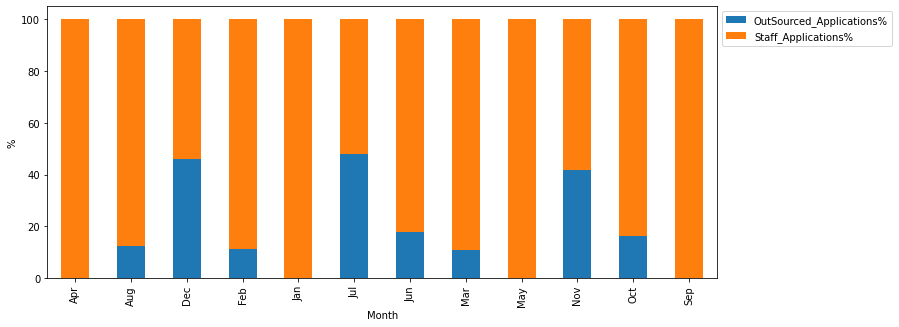

In [105]:
plot = df_grouped.plot(kind='bar', stacked=True, figsize=(12, 5))
plot.set_ylabel('%')
plt.legend( bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In [92]:
# # Creating the DataFrame with cost/application for Worst Case scenario
df_1.rename(columns = {"Out_Sourced" : "OutSourced_Application"},inplace=True)
df_1['Staff_Application']=df_1['Demand']-df_1['OutSourced_Application']
df_1['State']=df_1['StateMonth'].apply(lambda x: x[0])
df_1['Month']=df_1['StateMonth'].apply(lambda x: x[1])

In [93]:
df_Worst=df_1[['State','Month','Demand','OutSourced_Application','Staff_Application','FTE']]
df_Worst['UnitOutSourceCost']= final_data['UnitOutSourceCost']
df_Worst['MonthlySalary']=final_data['MonthlySalary']
df_Worst["Total Cost"]=df_Worst["FTE"]*df_Worst['MonthlySalary']+df_Worst["OutSourced_Application"]*df_Worst["UnitOutSourceCost"]
df_Worst['Cost/Application_WorstCase']=df_Worst["Total Cost"]/df_Worst["Demand"]
df_Worst.head()

,State,Month,Demand,OutSourced_Application,Staff_Application,FTE,UnitOutSourceCost,MonthlySalary,Total Cost,Cost/Application_WorstCase
0,A,Jan,5240,0.0,5240.0,187.14,180,5000.0,935700.0,178.568702
1,A,Feb,4878,1463.0,3415.0,131.35,180,5000.0,920090.0,188.620336
2,A,Mar,5942,0.0,5942.0,212.21,180,5000.0,1061050.0,178.567822
3,A,Apr,2297,0.0,2297.0,76.57,180,5000.0,382850.0,166.673923
4,A,May,1992,0.0,1992.0,71.14,180,5000.0,355700.0,178.564257


In [94]:
# # Creating the DataFrame with cost/application for Best Case scenario
df_2.rename(columns = {"Out_Sourced" : "OutSourced_Application"},inplace=True)
df_2['Staff_Application']=df_2['Demand']-df_2['OutSourced_Application']
df_2['State']=df_2['StateMonth'].apply(lambda x: x[0])
df_2['Month']=df_2['StateMonth'].apply(lambda x: x[1])

In [95]:
df_Best=df_2[['State','Month','Demand','OutSourced_Application','Staff_Application','FTE']]
df_Best['UnitOutSourceCost']= final_data['UnitOutSourceCost']
df_Best['MonthlySalary']=final_data['MonthlySalary']
df_Best["Total Cost"]=df_Best["FTE"]*df_Best['MonthlySalary']+df_Best["OutSourced_Application"]*df_Best["UnitOutSourceCost"]
df_Best['Cost/Application_BestCase']=df_Best["Total Cost"]/df_Best["Demand"]
df_Best.head()

,State,Month,Demand,OutSourced_Application,Staff_Application,FTE,UnitOutSourceCost,MonthlySalary,Total Cost,Cost/Application_BestCase
0,A,Jan,5240,0.0,5240.0,145.56,180,5000.0,727800.0,138.893130
1,A,Feb,4878,0.0,4878.0,143.47,180,5000.0,717350.0,147.058221
2,A,Mar,5942,0.0,5942.0,185.69,180,5000.0,928450.0,156.252104
3,A,Apr,2297,0.0,2297.0,67.56,180,5000.0,337800.0,147.061384
4,A,May,1992,0.0,1992.0,58.59,180,5000.0,292950.0,147.063253


In [96]:
Cost_df=pd.concat([df_Worst['Cost/Application_WorstCase'],df_Best['Cost/Application_BestCase'] ], join = 'outer', axis = 1)
Cost_df['StateMonth']=df_Best['State']+'-'+df_Best['Month']

In [97]:
Cost_df.head()

,Cost/Application_WorstCase,Cost/Application_BestCase,StateMonth
0,178.568702,138.893130,A-Jan
1,188.620336,147.058221,A-Feb
2,178.567822,156.252104,A-Mar
3,166.673923,147.061384,A-Apr
4,178.564257,147.063253,A-May


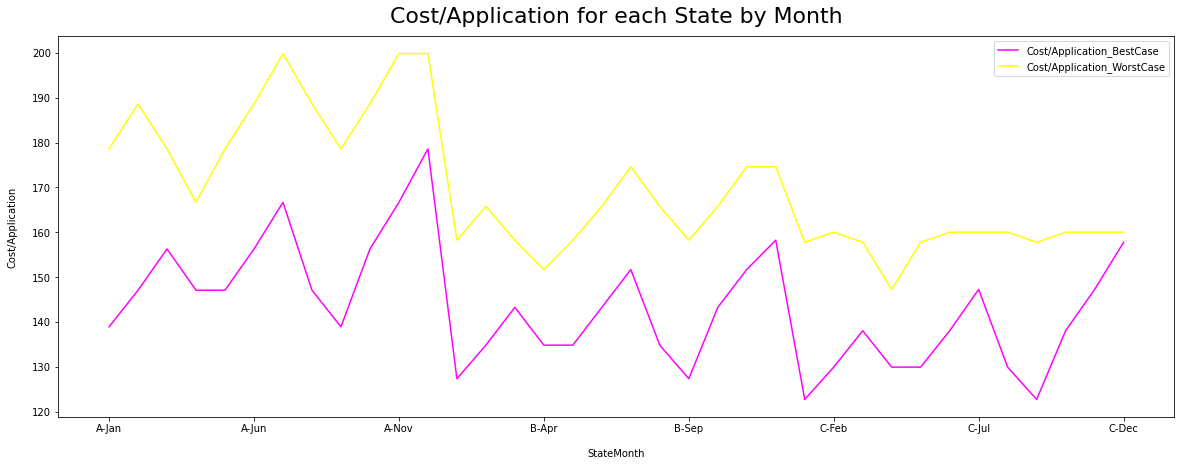

In [98]:
Cost_df.set_index('StateMonth')[['Cost/Application_BestCase','Cost/Application_WorstCase']].plot(kind = 'line',colormap='spring',figsize=(20, 7))
plt.xlabel("StateMonth", labelpad=15)
plt.ylabel("Cost/Application", labelpad=15)
plt.title("Cost/Application for each State by Month", y=1.02, fontsize=22)
plt.show()